In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy import create_engine
import numpy as np
import pathlib
from ccfwidget import CCFWidget
import ipywidgets as widgets
import utils

In [2]:
NUM_CHANNELS = 384

In [3]:
 # allow integers >8 bytes to be stored in sqlite3
sqlite3.register_adapter(np.int64, lambda val: int(val))
sqlite3.register_adapter(np.int32, lambda val: int(val))
# ------------------------------------------------------------------------------------
DB_PATH = pathlib.Path('//allen/programs/mindscope/workgroups/dynamicrouting/dynamic_gating_insertions/dr_master.db')
# with contextlib.suppress(OSError):
#     DB_PATH.unlink()
sqlite3.connect(DB_PATH).close()
DB = f"sqlite:///{DB_PATH}"
ENGINE = create_engine(DB, echo=False)

df_ccf = pd.read_sql('channel_ccf_coords', con=ENGINE)
df_ccf

,index,session,MID,Day,Probe,Implant,Hole,Rig,Channel_annotation_file,Channel_0_AP,...,Channel_381_ML,Channel_381_region,Channel_382_AP,Channel_382_DV,Channel_382_ML,Channel_382_region,Channel_383_AP,Channel_383_DV,Channel_383_ML,Channel_383_region
0,0,1167400342,599657,1,A,41,None,NP1,//allen/programs/mindscope/workgroups/np-behav...,227.0,...,204.0,root,193.0,20.0,204.0,root,192.0,20.0,204.0,root
1,1,1167400342,599657,1,B,41,None,NP1,//allen/programs/mindscope/workgroups/np-behav...,322.0,...,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain
2,2,1167400342,599657,1,C,41,None,NP1,//allen/programs/mindscope/workgroups/np-behav...,328.0,...,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain
3,3,1167400342,599657,1,D,41,None,NP1,//allen/programs/mindscope/workgroups/np-behav...,332.0,...,72.0,root,341.0,28.0,72.0,root,341.0,28.0,72.0,root
4,4,1167400342,599657,1,E,41,None,NP1,//allen/programs/mindscope/workgroups/np-behav...,216.0,...,113.0,root,224.0,20.0,112.0,root,224.0,20.0,112.0,root
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1135,664851_2023-11-16,664851,4,B,2002,C2,NP3,No annotation file,NaN,...,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated
1136,1136,664851_2023-11-16,664851,4,C,2002,D3,NP3,No annotation file,NaN,...,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated
1137,1137,664851_2023-11-16,664851,4,D,2002,A2,NP3,No annotation file,NaN,...,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated
1138,1138,664851_2023-11-16,664851,4,E,2002,A3,NP3,No annotation file,NaN,...,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated


In [4]:
implants = df_ccf['Implant'].unique()
implants

array(['41', 'football', 'TS1', 'TS5', '2002', 'templ',
       'Templeton/v1/0283-200-001'], dtype=object)

In [5]:
df_hit_rate = pd.read_sql_table('hit_region', con=ENGINE)

In [6]:
df_hit_rate

,index,session,MID,Day,Probe,Implant,Hole,Rig,ACAd,ACAv,...,VISrl,VL,VM,VPL,VPM,VTA,ZI,AUDp,CLA,MGd
0,0,1167400342,599657,1,A,41,None,NP1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1167400342,599657,1,B,41,None,NP1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1167400342,599657,1,C,41,None,NP1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1167400342,599657,1,D,41,None,NP1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1167400342,599657,1,E,41,None,NP1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1135,664851_2023-11-16,664851,4,B,2002,C2,NP3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,1136,664851_2023-11-16,664851,4,C,2002,D3,NP3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,1137,664851_2023-11-16,664851,4,D,2002,A2,NP3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,1138,664851_2023-11-16,664851,4,E,2002,A3,NP3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_hit_rate.drop(columns=['index', 'session'], inplace=True)

In [8]:
hit_rate_groups = list(df_hit_rate.groupby(by=['Probe', 'Implant']).indices.keys())
dropdown_options = [('Probe Implant:', hit_rate_group[0], hit_rate_group[1]) for hit_rate_group in hit_rate_groups]
dropdown_options.append(('Probe Implant:', 'all', 'all'))

In [9]:
group_dropdown = widgets.Dropdown(
    options=dropdown_options,
    value=dropdown_options[-1],
    description='Probe, implant',
    disabled=False,
)
group_dropdown

Dropdown(description='Probe, implant', index=42, options=(('Probe Implant:', 'A', '2002'), ('Probe Implant:', …

In [10]:
header, probe, implant = group_dropdown.value

if probe != 'all':
    df_hit_rate_group = df_hit_rate[(df_hit_rate['Probe'] == probe)
                                    & (df_hit_rate['Implant'] == implant)]
else:
    df_hit_rate_group = df_hit_rate

In [11]:
df_hit_rate_group

,MID,Day,Probe,Implant,Hole,Rig,ACAd,ACAv,ACB,AD,...,VISrl,VL,VM,VPL,VPM,VTA,ZI,AUDp,CLA,MGd
0,599657,1,A,41,None,NP1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,599657,1,B,41,None,NP1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,599657,1,C,41,None,NP1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,599657,1,D,41,None,NP1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,599657,1,E,41,None,NP1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,664851,4,B,2002,C2,NP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,664851,4,C,2002,D3,NP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,664851,4,D,2002,A2,NP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,664851,4,E,2002,A3,NP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

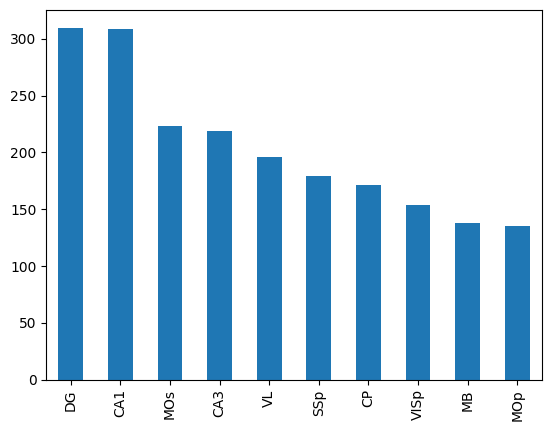

In [12]:
df_hit_rate_group_areas = df_hit_rate_group.iloc[:, 6:].sum().sort_values(ascending=False)[0:10]
df_hit_rate_group_areas.plot(kind='bar')

In [13]:
#implant = '2002'
#df_ccf = df_ccf.loc[df_ccf['Implant'] == '2002']
if probe != 'all':
    df_ccf = df_ccf.loc[(df_ccf['Probe'] == probe) & (df_ccf['Implant'] == implant)]
area_counts = {}
area_trajectories = {}

for index, row in df_ccf.iterrows():
    areas_seen = set()
    for i in range(NUM_CHANNELS):
        region_column = f'Channel_{i}_region'
        region = row[region_column]

        if region != 'out of brain' and region != 'root' and region != 'Track not annotated':
            region_stripped = utils.strip_subregions_layers(region)
            if region_stripped in area_counts and region_stripped not in areas_seen:
                area_counts[region_stripped] += 1
                area_trajectories[region_stripped].append(row.iloc[9:].to_numpy().reshape((384, 4))[:, 0:3]*25)
                areas_seen.add(region_stripped)
            elif region_stripped not in area_counts:
                area_counts[region_stripped] = 1
                area_trajectories[region_stripped] = [row.iloc[9:].to_numpy().reshape((384, 4))[:, 0:3]*25]
                areas_seen.add(region_stripped)

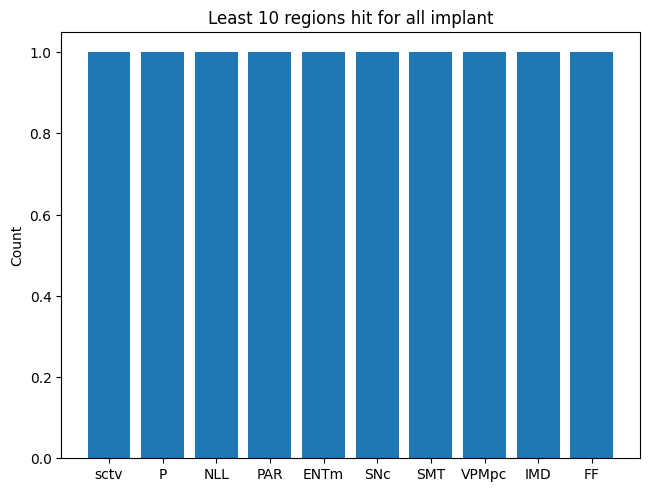

In [14]:
non_fiber_counts = dict(filter(lambda item: not item[0].islower(), area_counts.items()))
min_10_regions = sorted(area_counts.items(), key=lambda x:x[1])[0:10]
fig, ax = plt.subplots()
ax.bar([region[0] for region in min_10_regions], [region[1] for region in min_10_regions])
fig.tight_layout()
ax.set_ylabel('Count')
plt.title(f'Least 10 regions hit for {implant} implant')
plt.show()

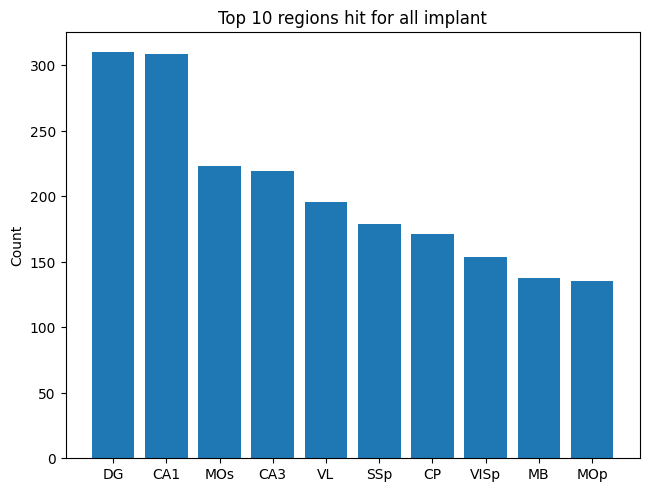

In [15]:
non_fiber_counts = dict(filter(lambda item: not item[0].islower(), area_counts.items()))
max_10_regions = sorted(non_fiber_counts.items(), key=lambda x:x[1], reverse=True)[0:10]
fig, ax = plt.subplots()
ax.bar([region[0] for region in max_10_regions], [region[1] for region in max_10_regions])
fig.tight_layout()
ax.set_ylabel('Count')
ax.set_title(f'Top 10 regions hit for {implant} implant')
plt.show()

In [16]:
non_fiber_counts = [area for area in area_counts if not area.islower()]
area_dropdown = widgets.Dropdown(
    options=sorted(non_fiber_counts),
    value=sorted(non_fiber_counts)[0],
    description='CCF Area:',
    disabled=False,
)
area_dropdown

Dropdown(description='CCF Area:', options=('ACAd', 'ACAv', 'ACB', 'AD', 'AId', 'AIv', 'AMd', 'AMv', 'AON', 'AP…

In [17]:
print(f'Number of times hit for area {area_dropdown.value}: {area_counts[area_dropdown.value]}')

Number of times hit for area MOs: 223


In [19]:
area_trajectories[area_dropdown.value]

[array([[5675.0, 3800.0, 5350.0],
        [5675.0, 3800.0, 5350.0],
        [5650.0, 3775.0, 5350.0],
        ...,
        [4825.0, 500.0, 5100.0],
        [4825.0, 500.0, 5100.0],
        [4800.0, 500.0, 5100.0]], dtype=object),
 array([[4675.0, 5050.0, 5550.0],
        [4675.0, 5050.0, 5525.0],
        [4650.0, 5000.0, 5500.0],
        ...,
        [2950.0, 1350.0, 4375.0],
        [2900.0, 1350.0, 4375.0],
        [2900.0, 1350.0, 4375.0]], dtype=object),
 array([[5725.0, 3950.0, 5550.0],
        [5725.0, 3950.0, 5550.0],
        [5725.0, 3950.0, 5550.0],
        ...,
        [4900.0, 200.0, 5400.0],
        [4900.0, 200.0, 5400.0],
        [4900.0, 175.0, 5425.0]], dtype=object),
 array([[4475.0, 4875.0, 5300.0],
        [4450.0, 4875.0, 5300.0],
        [4450.0, 4875.0, 5300.0],
        ...,
        [2600.0, 1250.0, 4200.0],
        [2600.0, 1225.0, 4175.0],
        [2600.0, 1225.0, 4175.0]], dtype=object),
 array([[5600.0, 4250.0, 5550.0],
        [5600.0, 4200.0, 5550.0],
      

In [18]:
probe_trajectories_area = area_trajectories[area_dropdown.value]
probe_trajectories_area = [probe_trajectories[probe_trajectories[:, 1] > 0] for probe_trajectories in probe_trajectories_area]
ccf = CCFWidget(markers=probe_trajectories_area, selected_acronyms=[area_dropdown.value])
print(f'Displaying {area_counts[area_dropdown.value]} trajectories for area {area_dropdown.value}')
ccf

Displaying 223 trajectories for area MOs


CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…

In [46]:
multiple_areas = ['ORBl', 'ORBm', 'ORBvl']
probe_trajectories_areas_multiple = []

for area in multiple_areas:
    probe_area = area_trajectories[area]
    probe_area_filtered = [probe_trajectories[probe_trajectories[:, 1] > 0] for probe_trajectories in probe_area]
    probe_trajectories_areas_multiple.append(probe_area_filtered)
    
ccf_multiple_areas = CCFWidget(markers=probe_trajectories_areas_multiple[0], selected_acronyms=multiple_areas)
ccf_multiple_areas

CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…

In [20]:
area_of_interest = 'VISp'
probe_trajectories_area = area_trajectories[area_of_interest]
probe_trajectories_area = [probe_trajectories[probe_trajectories[:, 1] > 0] for probe_trajectories in probe_trajectories_area]
ccf = CCFWidget(markers=probe_trajectories_area, selected_acronyms=[area_of_interest])
print(f'Displaying {area_counts[area_dropdown.value]} trajectories for area {area_of_interest}')
ccf

Displaying 114 trajectories for area VISp


CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…